### Задача производственного планирования и расписаний - Job Shop Scheduling Problem (JSSP)

Одной из распространённых задач планирования является задача Job Shop Scheduling (планирование производственного цеха). В ней несколько заданий состоят из последовательностей операций, и каждая операция должна выполняться на одной из доступных машин.

Каждое задание (заказ) включает последовательность этапов, которые необходимо выполнять в строго заданном порядке. Каждый этап обрабатывается на определённой машине. Основная цель заключается в том, чтобы составить расписание выполнения задач на машинах таким образом, чтобы минимизировать общее время завершения всех заданий (makespan).

### Формулировка:

 - Есть набор Заказов (Jobs).
 - Каждый заказ состоит из Этапов (Operations).
 - Каждый этап требует выполнения на конкретном Рабочем Центре (Machine) в течение заданного времени.

### Ограничения:
- Ограничения приоритета. Ни одна задача задания не может быть запущена до тех пор, пока не будет завершена предыдущая задача этого задания.
- Отсутствие ограничений перекрытия. Машина может одновременно выполнять только одну задачу. Машина не может работать над двумя задачами одновременно.
- Задача, однажды начавшись, должна быть выполнена до завершения.


### Цель - построить такой график выполнения заказов, чтобы:
- Успеть выполнить задачу к заданному сроку (дедлайну)
- Минимизировать задержки / простои
- Минимизировать **makespan** — общее время завершения всех заказов
- Оптимизировать порядок выполнения срочных заказов
- Для каждой Задачи выбрать оптимальный Рабочий Центр (РЦ) для исполнения - Flexible Job Shop Scheduling Problem (**FJSSP**)

📌 Разница:
В классическом **JSSP** для каждого этапа задана фиксированная машина.
В **FJSSP** каждый этап может выполняться на одной из нескольких машин, и оптимизатор сам выбирает, на какой, чтобы минимизировать **makespan** или задержки.

#### Пример Job Shop Scheduling

Допустим, у нас есть два заказа (A и B) и три машины (M1, M2, M3).  
Каждый заказ состоит из трёх операций, которые должны выполняться в определённом порядке:

- Заказ A: A1 → A2 → A3  
- Заказ B: B1 → B2 → B3  

Диаграмма Ганта показывает, как операции распределяются по машинам:

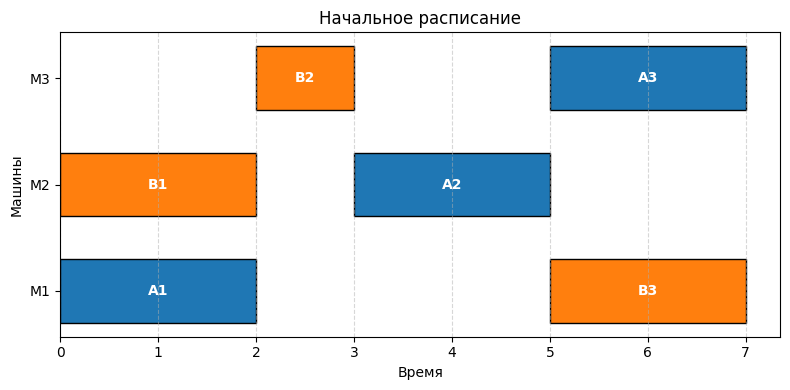

#### Пример расписания после оптимизации:

Три заказа (A, B и C) и три машины (M1, M2, M3). 

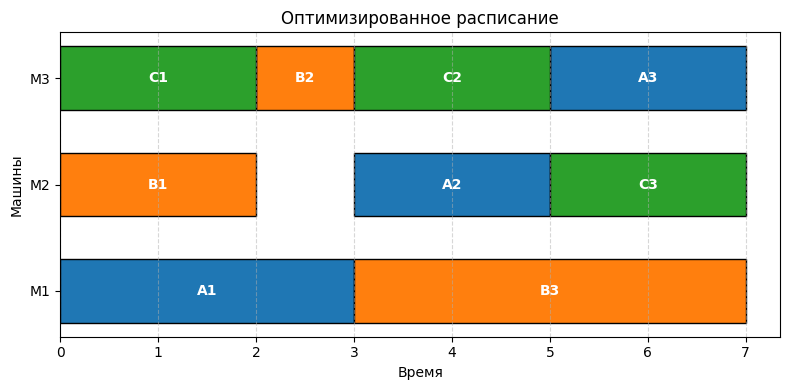

In [1]:
# Импорт данных
# "Файл для заполнения  копия GTC-2.xlsx"

import pandas as pd

all_sheets = pd.read_excel(r"C:\\Vlad\\Python\\Dmitriy_Y\\Data\\Файл для заполнения  копия GTC-2.xlsx", sheet_name=["Потребности производства (нов)", "Загрузка рабочих центров"])
Prod_demand = all_sheets["Потребности производства (нов)"]
Prod_demand.head(5)


,Дата производства,Приоритет,Клиент,Заказ клиента,Договор подписан,Код наименования продукта,Количество,Номенклатура,Характеристика (код 1С),Подразделение,Спецификация из 1С,Количество выпущенного,Количество.1
0,2025-07-31,NaN,МО,Заказ клиента БТ00-000033 от 01.04.2025 14:37:24,Да,22.000333-NA-D91200-L6A-600001-BLMAMBAWP,297959.0,Ткань полиамидная мембранная Иртыш Olive BL MA...,00000020877,NaN,"Иртыш полный маршрут Ти 200, 7 вар. суровья",NaN,297959.0
1,2025-08-31,NaN,МО,Заказ клиента БТ00-000033 от 01.04.2025 14:37:24,Да,22.000333-NA-D91200-L6A-600001-BLMAMBAWP,348993.0,Ткань полиамидная мембранная Иртыш Olive BL MA...,00000020877,NaN,"Иртыш полный маршрут Ти 200, 7 вар. суровья",NaN,348993.0
2,2025-09-30,NaN,МО,Заказ клиента БТ00-000033 от 01.04.2025 14:37:24,Да,22.000333-NA-D91200-L6A-600001-BLMAMBAWP,348990.0,Ткань полиамидная мембранная Иртыш Olive BL MA...,00000020877,NaN,"Иртыш полный маршрут Ти 200, 7 вар. суровья",NaN,348990.0
3,2025-07-31,NaN,МО,Заказ клиента БТ00-000033 от 01.04.2025 14:37:24,Да,22.002207-PRAS-D91200-COR-600001-BO,41201.0,Ткань полиамидная Днепр 18-0527 TCX Olive Bran...,00-00047396,NaN,Днепр PRAS полный маршрут 9 вар. сур.,NaN,41201.0
4,2025-08-31,NaN,МО,Заказ клиента БТ00-000033 от 01.04.2025 14:37:24,Да,22.002207-PRAS-D91200-COR-600001-BO,41419.0,Ткань полиамидная Днепр 18-0527 TCX Olive Bran...,00-00047396,NaN,Днепр PRAS полный маршрут 9 вар. сур.,NaN,41419.0


In [2]:
# Загрузка рабочих центров
# "Файл для заполнения  копия GTC-2.xlsx"

Workstations_load = all_sheets["Загрузка рабочих центров"]
Workstations_load.head(5)

,Рабочий центр из 1С,Наименование этапа ресурсной спецификации из 1С,Ресурсная спецификация из 1С,Код полного изделия,Наименование ГП из 1С,Размер партии,Часов на партию,"Скорость, м.п./мин"
0,Машина инспекционная MAAG (РЦ 1100),Подготовка Партии (1100-001),220.20030-NA-0-0-190414-ST_AP полный сур. 88.7...,220.20030-NA-0-0-190414-ST_AP,Полотно трикотажное полиэфирное флисовое Уссур...,NaN,NaN,15.0
1,Машина крашения Then/Fongs Airflow (РЦ 2010),Промывка Softflow+крашение Softflow (2010-050),220.20030-NA-0-0-190414-ST_AP полный сур. 88.7...,220.20030-NA-0-0-190414-ST_AP,Полотно трикотажное полиэфирное флисовое Уссур...,1300.0,11.0,NaN
2,Машина жгуторасправительная Corino Superslit A...,Расправка и Укладка Corino (2200-001),220.20030-NA-0-0-190414-ST_AP полный сур. 88.7...,220.20030-NA-0-0-190414-ST_AP,Полотно трикотажное полиэфирное флисовое Уссур...,NaN,NaN,15.0
3,Машина Stenter Monfort 45T81430 (N1) (РЦ 1400),Сушка (1400-400),220.20030-NA-0-0-190414-ST_AP полный сур. 88.7...,220.20030-NA-0-0-190414-ST_AP,Полотно трикотажное полиэфирное флисовое Уссур...,NaN,NaN,25.0
4,Машина Stenter Monfort 45T81430 (N1) (РЦ 1400),Отделка (5000-001),220.20030-NA-0-0-190414-ST_AP полный сур. 88.7...,220.20030-NA-0-0-190414-ST_AP,Полотно трикотажное полиэфирное флисовое Уссур...,NaN,NaN,25.0


In [3]:
# ОбщаяТаблица рабочих центров РЦ и Этапов

Workstations_load2 = pd.DataFrame()

# --- Вариант 1: только 4 цифры в последних скобках ---
Workstations_load2["РЦ"] = Workstations_load["Рабочий центр из 1С"].str.extract(r"\((?:[^0-9]*?)(\d{4})(?:[^0-9]*?)\)$")

# --- Вариант 2: всё содержимое последних скобок ---
Workstations_load2["Этапы"] = Workstations_load["Наименование этапа ресурсной спецификации из 1С"].str.extract(r"\(([^()]*)\)$")

Workstations_load2["Скорость"] = Workstations_load["Скорость, м.п./мин"]
Workstations_load2["Код полного изделия"] = Workstations_load["Код полного изделия"]

print(Workstations_load2)


       РЦ     Этапы  Скорость                   Код полного изделия
0    1100  1100-001      15.0         220.20030-NA-0-0-190414-ST_AP
1    2010  2010-050       NaN         220.20030-NA-0-0-190414-ST_AP
2    2200  2200-001      15.0         220.20030-NA-0-0-190414-ST_AP
3    1400  1400-400      25.0         220.20030-NA-0-0-190414-ST_AP
4    1400  5000-001      25.0         220.20030-NA-0-0-190414-ST_AP
..    ...       ...       ...                                   ...
394  1400  1400-380      35.0  220.50052-NA-MOX2-SUZDA-174408-SC+WP
395  3100  3100-010       7.5  220.50052-NA-MOX2-SUZDA-174408-SC+WP
396  1400  1400-601      14.0  220.50052-NA-MOX2-SUZDA-174408-SC+WP
397  1400  1400-100      14.0  220.50052-NA-MOX2-SUZDA-174408-SC+WP
398  9000  9000-002       7.5  220.50052-NA-MOX2-SUZDA-174408-SC+WP

[399 rows x 4 columns]


In [4]:
# Количество различных типов машин
# unique_machines = Workstations_load2["РЦ"].drop_duplicates().tolist()

unique_machines = Workstations_load2["РЦ"].unique()

print(len(unique_machines))
print(unique_machines)

20
['1100' '2010' '2200' '1400' '5350' '5360' '5370' '9000' '1200' '1120'
 '3100' '4100' '4200' '4250' '5500' '5200' '4150' '1110' '2080' '5400']


In [5]:
# Количество различных этапов

print(len(Workstations_load2["Этапы"].unique()))
Workstations_load2["Этапы"].unique()

70


array(['1100-001', '2010-050', '2200-001', '1400-400', '5000-001',
       '5350-002', '5350-003', '5360-004', '1400-009', '5370-002',
       '9000-002', '1100-014', '1200-005', '1400-382', '1900-010',
       '2010-014', '1400-383', '3100-020', '3100-028', '1400-601',
       '1400-100', '1100-020', '2010-018', '2200-002', '1400-001',
       '1900-001', '2010-019', '1400-500', '5000-025', '1200-001',
       '1400-300', '3100-025', '4100-010', '4200-001', '4250-001',
       '1400-380', '3100-010', '5500-002', '2010-001', '5200-001',
       '4150-001', '1200-004', '1400-020', '3100-003', '5000-012',
       '1100-008', '1400-501', '5000-100', '3100-100', '1100-009',
       '1400-903', '3100-033', '2080-001', '3100-001', '1100-005',
       '2010-301', '5500-022', '1400-012', '5000-024', '2010-002',
       '1400-004', '1400-021', '1900-004', '1400-403', '3100-002',
       '5400-001', '5000-009', '5500-006', '2200-005', '1400-301'],
      dtype=object)

In [8]:
# Уникальные пары РЦ-Этап
# Каждый этап закреплён ровно за одной машиной !!

# unique_pairs = Workstations_load2[["РЦ", "Этапы"]].drop_duplicates()

unique_pairs = Workstations_load2.groupby("Этапы")["РЦ"].unique().reset_index()
unique_pairs

,Этапы,РЦ
0,1100-001,[1100]
1,1100-005,[1100]
2,1100-008,[1110]
3,1100-009,[1110]
4,1100-014,[1100]
...,...,...
65,5400-001,[5400]
66,5500-002,[5500]
67,5500-006,[5500]
68,5500-022,[5500]


### Определения

Первый заказ - БТ00-000033, 2 вида продукта:

 - 22.000333-NA-D91200-L6A-600001-BLMAMBAWP
 - 22.002207-PRAS-D91200-COR-600001-BO


Второй заказ - БТ00-000050, 1 вид продукта:
 - 22.002207-PRAS-D91200-COR-600001-BO

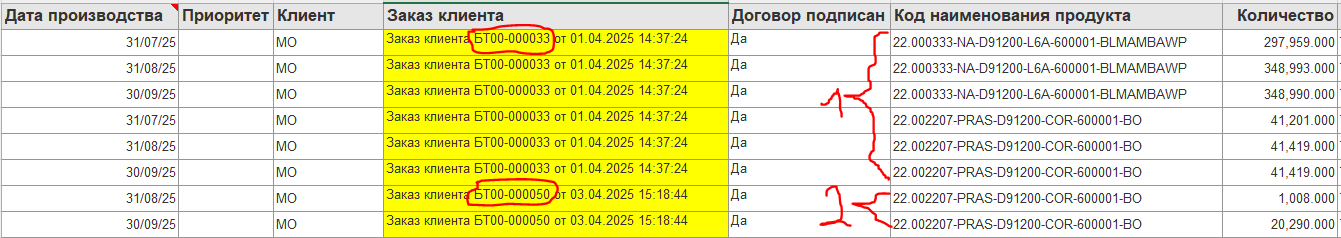

### Тест с одним продуктом в заказе.

In [6]:
# Выбираем номер заказа - строим таблицу РЦ - Этапы - Время Этапов.

job_id = 5
product_code = Prod_demand["Код наименования продукта"].iloc[job_id]

# фильтрация по коду полного изделия
filtered = Workstations_load[Workstations_load["Код полного изделия"] == product_code]

# формируем job_data
job_data = pd.DataFrame()
job_data["РЦ"] = filtered["Рабочий центр из 1С"].str.extract(r"\((?:[^0-9]*?)(\d{4})(?:[^0-9]*?)\)$")
job_data["Этапы"] = filtered["Наименование этапа ресурсной спецификации из 1С"].str.extract(r"\(([^()]*)\)$")
job_data["Скорость"] = filtered["Скорость, м.п./мин"].fillna(15) # пропущенные скорости сделаем = 15

# вычисляем время каждого этапа
Number_of_meters = Prod_demand["Количество"].iloc[job_id]
job_data["Время, мин"] = (Number_of_meters / job_data["Скорость"]).round(1)

# добавляем идентификаторы
job_data["job_id"] = job_id
# job_data["product_code"] = product_code

print(job_data)

      РЦ     Этапы  Скорость  Время, мин  job_id
81  1100  1100-020      15.0      2761.3       5
82  1200  1200-001      20.0      2071.0       5
83  1400  1400-020      27.0      1534.0       5
84  1120  1900-001      24.0      1725.8       5
85  2010  2010-014      15.0      2761.3       5
86  2200  2200-001      15.0      2761.3       5
87  1400  1400-300      50.0       828.4       5
88  3100  3100-003       7.5      5522.5       5
89  4100  4100-010      35.0      1183.4       5
90  4150  4150-001      17.0      2436.4       5
91  4200  4200-001      27.0      1534.0       5
92  4250  4250-001      40.0      1035.5       5
93  1400  1400-380      50.0       828.4       5
94  1400  5000-001      17.0      2436.4       5
95  9000  9000-002       7.5      5522.5       5


#### Получить для каждого этапа доступные машины - jobs_data в формате для OR-Tools

In [ ]:
# Пример

jobs_data = [
    # Заказ 0 (дедлайн 6)
    (6, [
        [(0, 3), (1, 4), (2, 5)],   # Этап 0 (машина, время выполнения)
        [(0, 2), (1, 1), (2, 3)]    # Этап 1
    ]),
    # Заказ 1 (дедлайн 10)
    (10, [
        [(0, 2), (1, 3), (2, 4)],   # Этап 0
        [(0, 4), (1, 5), (2, 6)]    # Этап 1
    ]),
    # Заказ 2 (дедлайн 12)
    (12, [
        [(0, 3), (1, 4), (2, 5)],   # Этап 0
        [(0, 2), (1, 4), (2, 6)]    # Этап 1
    ])
]

In [9]:
# Для каждого этапа - jobs_data в формате для OR-Tools

# --- Исходные данные ---
Zakaz_jobs_data = job_data[["Этапы", "Время, мин"]]
Zakaz_jobs_data

# --- Список всех доступных машин ---
# machines = unique_machines

machines = [
    '1100', '2010', '2200', '1400', '5350', '5360', '5370', '9000', '1200', '1120',
    '3100', '4100', '4200', '4250', '5500', '5200', '4150', '1110', '2080', '5400'
]


machine_to_id = {m: i for i, m in enumerate(machines)}
deadline = 20000

# --- Построение списка этапов ---
tasks = []

for i, row in Zakaz_jobs_data.reset_index(drop=True).iterrows():
    etap_code = row["Этапы"]
    duration_min = row["Время, мин"]

    # --- Берем все возможные машины для этапа из unique_pairs ---
    possible_machines = unique_pairs.loc[unique_pairs["Этапы"] == etap_code, "РЦ"].values
    if len(possible_machines) == 0:
        raise ValueError(f"Нет машин для этапа {i} ({etap_code}).")
    possible_machines = possible_machines[0]  # это numpy array из unique()

    # Выводим комментарий
    print(f"# Этап {i}: {etap_code} → машины {', '.join(possible_machines)}")

    dur_int = int(round(duration_min))
    machine_options = [(machine_to_id[m], dur_int) for m in possible_machines if m in machine_to_id]
    tasks.append(machine_options)

# Финальная структура
jobs_data = [(deadline, tasks)]
jobs_data

# Этап 0: 1100-020 → машины 1100
# Этап 1: 1200-001 → машины 1200
# Этап 2: 1400-020 → машины 1400
# Этап 3: 1900-001 → машины 1120
# Этап 4: 2010-014 → машины 2010
# Этап 5: 2200-001 → машины 2200
# Этап 6: 1400-300 → машины 1400
# Этап 7: 3100-003 → машины 3100
# Этап 8: 4100-010 → машины 4100
# Этап 9: 4150-001 → машины 4150
# Этап 10: 4200-001 → машины 4200
# Этап 11: 4250-001 → машины 4250
# Этап 12: 1400-380 → машины 1400
# Этап 13: 5000-001 → машины 1400
# Этап 14: 9000-002 → машины 9000


[(20000,
  [[(0, 2761)],
   [(8, 2071)],
   [(3, 1534)],
   [(9, 1726)],
   [(1, 2761)],
   [(2, 2761)],
   [(3, 828)],
   [(10, 5522)],
   [(11, 1183)],
   [(16, 2436)],
   [(12, 1534)],
   [(13, 1036)],
   [(3, 828)],
   [(3, 2436)],
   [(7, 5522)]])]

In [10]:
def build_jobs_data(list_of_orders, deadlines, machines, unique_pairs):
    """
    Строит структуру jobs_data для списка заказов.

    Parameters:
        list_of_orders : list of pd.DataFrame
            Каждый DataFrame содержит столбцы ["Этапы", "Время этапа, мин"]
        deadlines : list of int
            Дедлайны для каждого заказа
        machines : list of str
            Список всех машин
        unique_pairs : pd.DataFrame
            DataFrame со столбцами ["Этапы", "РЦ"], где "РЦ" = список возможных машин

    Returns:
        jobs_data : list of tuples
            Формат: [(deadline, [этапы]), ...]
            Этапы: список, где для каждого этапа список (machine_id, duration)
    """
    machine_to_id = {m: i for i, m in enumerate(machines)}
    jobs_data = []

    for order_idx, (order_df, deadline) in enumerate(zip(list_of_orders, deadlines)):
        tasks = []
        for i, row in order_df.reset_index(drop=True).iterrows():
            etap_code = row["Этапы"]
            duration_min = row["Время, мин"]

            # --- Все возможные машины для этапа из unique_pairs ---
            possible_machines = unique_pairs.loc[unique_pairs["Этапы"] == etap_code, "РЦ"].values
            if len(possible_machines) > 0:
                possible_machines = possible_machines[0]  # массив из unique()
            else:
                possible_machines = []

            # --- Сопоставляем только те, что есть в machines ---
            machine_options = [(machine_to_id[m], int(round(duration_min)))
                               for m in possible_machines if m in machine_to_id]

            print(f"# Заказ {order_idx} Этап {i}: {etap_code} → машины {', '.join(possible_machines) if possible_machines else '(нет)'}")

            tasks.append(machine_options)

        jobs_data.append((deadline, tasks))

    return jobs_data


In [11]:
# Список заказов и дедлайны

# list_of_orders = [Zakaz_7_jobs_data, Zakaz_8_jobs_data, Zakaz_9_jobs_data]
# deadlines = [5000, 50000, 100000]

Zakaz_jobs_data = job_data[["Этапы", "Время, мин"]]
list_of_orders = [Zakaz_jobs_data]
deadlines = [20000]

# Получаем jobs_data
jobs_data = build_jobs_data(list_of_orders, deadlines, machines, unique_pairs)
jobs_data

# Заказ 0 Этап 0: 1100-020 → машины 1100
# Заказ 0 Этап 1: 1200-001 → машины 1200
# Заказ 0 Этап 2: 1400-020 → машины 1400
# Заказ 0 Этап 3: 1900-001 → машины 1120
# Заказ 0 Этап 4: 2010-014 → машины 2010
# Заказ 0 Этап 5: 2200-001 → машины 2200
# Заказ 0 Этап 6: 1400-300 → машины 1400
# Заказ 0 Этап 7: 3100-003 → машины 3100
# Заказ 0 Этап 8: 4100-010 → машины 4100
# Заказ 0 Этап 9: 4150-001 → машины 4150
# Заказ 0 Этап 10: 4200-001 → машины 4200
# Заказ 0 Этап 11: 4250-001 → машины 4250
# Заказ 0 Этап 12: 1400-380 → машины 1400
# Заказ 0 Этап 13: 5000-001 → машины 1400
# Заказ 0 Этап 14: 9000-002 → машины 9000


[(20000,
  [[(0, 2761)],
   [(8, 2071)],
   [(3, 1534)],
   [(9, 1726)],
   [(1, 2761)],
   [(2, 2761)],
   [(3, 828)],
   [(10, 5522)],
   [(11, 1183)],
   [(16, 2436)],
   [(12, 1534)],
   [(13, 1036)],
   [(3, 828)],
   [(3, 2436)],
   [(7, 5522)]])]

In [12]:
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

In [13]:
def solve_production_schedule(jobs_data, num_machines=20, horizon=20000, max_time_sec=10):
    """
    Строит и решает модель производственного расписания с минимизацией makespan.

    Parameters:
        jobs_data : list of tuples
            Список заказов [(deadline, [этапы]), ...]
            Этапы: список, где каждый этап → [(machine_id, duration), ...]
        num_machines : int
            Количество машин
        horizon : int
            Верхняя граница времени для переменных
        max_time_sec : int
            Максимальное время решения в секундах. Мы говорим решателю: «не ищи решение дольше max_time_sec секунд».
            Если решение найдено раньше — вернётся сразу.
            Если время вышло — решатель остановится и выдаст лучшее найденное решение, если оно есть.

    Returns:
        solver : CpSolver
        model : CpModel
        all_tasks : dict
        order_completion : dict
        makespan_var : CpModel variable
    """
    model = cp_model.CpModel()
    all_tasks = {}
    machine_to_intervals = {m: [] for m in range(num_machines)}
    order_completion = {}

    # --- Создаём переменные и интервалы для каждого заказа и этапа ---
    for order_id, (deadline, tasks) in enumerate(jobs_data):
        for task_id, machines in enumerate(tasks):
            start = model.NewIntVar(0, horizon, f"start_o{order_id}_t{task_id}")
            end = model.NewIntVar(0, horizon, f"end_o{order_id}_t{task_id}")

            alternatives = []
            machine_bools = []

            for machine_id, duration in machines:
                is_selected = model.NewBoolVar(f"assign_o{order_id}_t{task_id}_m{machine_id}")
                interval = model.NewOptionalIntervalVar(start, duration, end, is_selected,
                                                        f"interval_o{order_id}_t{task_id}_m{machine_id}")
                alternatives.append((machine_id, duration, is_selected, interval))
                machine_to_intervals[machine_id].append(interval)
                machine_bools.append(is_selected)

            model.Add(sum(machine_bools) == 1)  # ровно один вариант выбран
            all_tasks[(order_id, task_id)] = (start, end, alternatives)

        order_completion[order_id] = all_tasks[(order_id, len(tasks) - 1)][1]

    # --- Последовательность этапов внутри заказа ---
    for order_id, (deadline, tasks) in enumerate(jobs_data):
        for task_id in range(len(tasks) - 1):
            model.Add(all_tasks[(order_id, task_id + 1)][0] >= all_tasks[(order_id, task_id)][1])

    # --- Ограничения загрузки машин ---
    for machine_id in range(num_machines):
        model.AddNoOverlap(machine_to_intervals[machine_id])

    # --- Целевая функция: минимизация makespan ---
    makespan = model.NewIntVar(0, horizon, "makespan")
    model.AddMaxEquality(makespan, [order_completion[o] for o in order_completion])
    model.Minimize(makespan)

    # --- Решение ---
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = max_time_sec
    status = solver.Solve(model)

    # --- Вывод результатов ---
    if status in (cp_model.OPTIMAL, cp_model.FEASIBLE):
        print(f"Минимальный makespan = {solver.Value(makespan)}\n")
        for order_id, (deadline, tasks) in enumerate(jobs_data):
            completion = solver.Value(order_completion[order_id])
            print(f"Заказ {order_id} (дедлайн {deadline}, завершение {completion}):")
            for task_id, machines in enumerate(tasks):
                start, end, alternatives = all_tasks[(order_id, task_id)]
                s_val, e_val = solver.Value(start), solver.Value(end)
                chosen = None
                for machine_id, duration, is_selected, _ in alternatives:
                    if solver.Value(is_selected):
                        chosen = machine_id
                        break
                print(f"  Этап {task_id}: Машина {chosen}, {s_val} -> {e_val}")
            print()
    else:
        print("Нет решения")

    return solver, model, all_tasks, order_completion, makespan


In [14]:
solver, model, all_tasks, order_completion, makespan_var = solve_production_schedule(
    jobs_data,
    num_machines=20,
    horizon=200000,
    max_time_sec=10
)

Минимальный makespan = 34939

Заказ 0 (дедлайн 20000, завершение 34939):
  Этап 0: Машина 0, 0 -> 2761
  Этап 1: Машина 8, 2761 -> 4832
  Этап 2: Машина 3, 4832 -> 6366
  Этап 3: Машина 9, 6366 -> 8092
  Этап 4: Машина 1, 8092 -> 10853
  Этап 5: Машина 2, 10853 -> 13614
  Этап 6: Машина 3, 13614 -> 14442
  Этап 7: Машина 10, 14442 -> 19964
  Этап 8: Машина 11, 19964 -> 21147
  Этап 9: Машина 16, 21147 -> 23583
  Этап 10: Машина 12, 23583 -> 25117
  Этап 11: Машина 13, 25117 -> 26153
  Этап 12: Машина 3, 26153 -> 26981
  Этап 13: Машина 3, 26981 -> 29417
  Этап 14: Машина 7, 29417 -> 34939



In [ ]:
def plot_gantt_chart(jobs_data, all_tasks, solver, num_machines=20, machine_names=None):
    """
    Строит Gantt chart производственного расписания.

    Parameters:
        jobs_data : list of tuples
            Список заказов [(deadline, [этапы]), ...]
        all_tasks : dict
            Словарь переменных модели: (start, end, alternatives) для каждого этапа
        solver : CpSolver
            Решатель с найденным решением
        num_machines : int
            Общее количество машин
        machine_names : list of str, optional
            Имена машин для оси Y (по умолчанию просто номера 0..num_machines-1)
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    for order_id, (deadline, tasks) in enumerate(jobs_data):
        for task_id, machines in enumerate(tasks):
            start, end, alternatives = all_tasks[(order_id, task_id)]
            s_val, e_val = solver.Value(start), solver.Value(end)

            # Найдём выбранную машину
            chosen = None
            for machine_id, duration, is_selected, _ in alternatives:
                if solver.Value(is_selected):
                    chosen = machine_id
                    break

            # Нарисуем прямоугольник на диаграмме
            ax.barh(y=chosen, width=e_val - s_val, left=s_val,
                    height=0.6, align="center",
                    color=colors[order_id % len(colors)],
                    edgecolor="black")

    # --- Настройки графика ---
    ax.set_yticks(range(num_machines))
    if machine_names:
        ax.set_yticklabels(machine_names)
    else:
        ax.set_yticklabels([str(m) for m in range(num_machines)])

    ax.set_xlabel("Время, минуты")
    ax.set_ylabel("Машины")
    ax.set_title("Производственное расписание (Gantt chart)")
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()


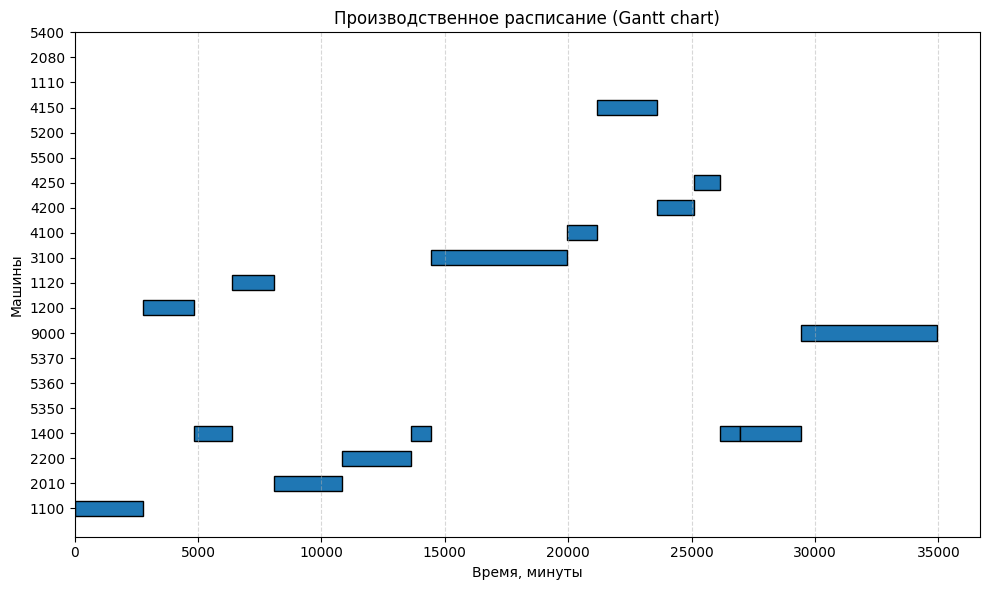

In [79]:
machine_names = machines  # если хочешь показывать реальные имена машин
plot_gantt_chart(jobs_data, all_tasks, solver, num_machines=20, machine_names=machine_names)

### Несколько заказов

In [16]:
def build_job_dataframes(job_ids, Prod_demand, Workstations_load):
    """
    Формирует список job_data для списка заказов.

    Parameters:
        job_ids : list of int
            Индексы заказов в Prod_demand
        Prod_demand : pd.DataFrame
            Датафрейм с данными по заказам (содержит "Код наименования продукта", "Количество")
        Workstations_load : pd.DataFrame
            Датафрейм с данными по рабочим центрам

    Returns:
        all_jobs : list of pd.DataFrame
            Список датафреймов job_data, по одному для каждого заказа
        all_jobs_ortools : list of pd.DataFrame
            Список датафреймов, но только со столбцами ["Этапы", "Время, мин"]
    """
    all_jobs = []
    all_jobs_ortools = []

    for job_id in job_ids:
        product_code = Prod_demand["Код наименования продукта"].iloc[job_id]

        # фильтрация по коду полного изделия
        filtered = Workstations_load[Workstations_load["Код полного изделия"] == product_code]

        # формируем job_data для одного заказа
        job_df = pd.DataFrame()
        job_df["РЦ"] = filtered["Рабочий центр из 1С"].str.extract(r"\((?:[^0-9]*?)(\d{4})(?:[^0-9]*?)\)$")
        job_df["Этапы"] = filtered["Наименование этапа ресурсной спецификации из 1С"].str.extract(r"\(([^()]*)\)$")
        job_df["Скорость"] = filtered["Скорость, м.п./мин"].fillna(15)

        # вычисляем время
        Number_of_meters = Prod_demand["Количество"].iloc[job_id]
        job_df["Время, мин"] = (Number_of_meters / job_df["Скорость"]).round(1)

        # добавляем идентификаторы
        job_df["job_id"] = job_id

        # сохраняем
        all_jobs.append(job_df)
        all_jobs_ortools.append(job_df[["Этапы", "Время, мин"]])

    return all_jobs, all_jobs_ortools


In [18]:
job_ids = [5, 7, 8]
all_jobs, all_jobs_ortools = build_job_dataframes(job_ids, Prod_demand, Workstations_load)

# полный job_data для заказа 5
print(all_jobs[0])

# только ["Этапы", "Время, мин"] для заказа 5
print(all_jobs_ortools[0])

      РЦ     Этапы  Скорость  Время, мин  job_id
81  1100  1100-020      15.0      2761.3       5
82  1200  1200-001      20.0      2071.0       5
83  1400  1400-020      27.0      1534.0       5
84  1120  1900-001      24.0      1725.8       5
85  2010  2010-014      15.0      2761.3       5
86  2200  2200-001      15.0      2761.3       5
87  1400  1400-300      50.0       828.4       5
88  3100  3100-003       7.5      5522.5       5
89  4100  4100-010      35.0      1183.4       5
90  4150  4150-001      17.0      2436.4       5
91  4200  4200-001      27.0      1534.0       5
92  4250  4250-001      40.0      1035.5       5
93  1400  1400-380      50.0       828.4       5
94  1400  5000-001      17.0      2436.4       5
95  9000  9000-002       7.5      5522.5       5
       Этапы  Время, мин
81  1100-020      2761.3
82  1200-001      2071.0
83  1400-020      1534.0
84  1900-001      1725.8
85  2010-014      2761.3
86  2200-001      2761.3
87  1400-300       828.4
88  3100-003    

In [19]:
list_of_orders = all_jobs_ortools
deadlines = [45000, 20000, 52000]

# Получаем jobs_data
jobs_data = build_jobs_data(list_of_orders, deadlines, machines, unique_pairs)
jobs_data

# Заказ 0 Этап 0: 1100-020 → машины 1100
# Заказ 0 Этап 1: 1200-001 → машины 1200
# Заказ 0 Этап 2: 1400-020 → машины 1400
# Заказ 0 Этап 3: 1900-001 → машины 1120
# Заказ 0 Этап 4: 2010-014 → машины 2010
# Заказ 0 Этап 5: 2200-001 → машины 2200
# Заказ 0 Этап 6: 1400-300 → машины 1400
# Заказ 0 Этап 7: 3100-003 → машины 3100
# Заказ 0 Этап 8: 4100-010 → машины 4100
# Заказ 0 Этап 9: 4150-001 → машины 4150
# Заказ 0 Этап 10: 4200-001 → машины 4200
# Заказ 0 Этап 11: 4250-001 → машины 4250
# Заказ 0 Этап 12: 1400-380 → машины 1400
# Заказ 0 Этап 13: 5000-001 → машины 1400
# Заказ 0 Этап 14: 9000-002 → машины 9000
# Заказ 1 Этап 0: 1100-020 → машины 1100
# Заказ 1 Этап 1: 1200-001 → машины 1200
# Заказ 1 Этап 2: 1400-020 → машины 1400
# Заказ 1 Этап 3: 1900-001 → машины 1120
# Заказ 1 Этап 4: 2010-014 → машины 2010
# Заказ 1 Этап 5: 2200-001 → машины 2200
# Заказ 1 Этап 6: 1400-300 → машины 1400
# Заказ 1 Этап 7: 3100-003 → машины 3100
# Заказ 1 Этап 8: 4100-010 → машины 4100
# Заказ 1 Э

[(45000,
  [[(0, 2761)],
   [(8, 2071)],
   [(3, 1534)],
   [(9, 1726)],
   [(1, 2761)],
   [(2, 2761)],
   [(3, 828)],
   [(10, 5522)],
   [(11, 1183)],
   [(16, 2436)],
   [(12, 1534)],
   [(13, 1036)],
   [(3, 828)],
   [(3, 2436)],
   [(7, 5522)]]),
 (20000,
  [[(0, 1353)],
   [(8, 1014)],
   [(3, 752)],
   [(9, 845)],
   [(1, 1353)],
   [(2, 1353)],
   [(3, 406)],
   [(10, 2705)],
   [(11, 580)],
   [(16, 1194)],
   [(12, 752)],
   [(13, 507)],
   [(3, 406)],
   [(3, 1194)],
   [(7, 2705)]]),
 (52000,
  [[(0, 3200)],
   [(8, 2400)],
   [(3, 1412)],
   [(9, 2000)],
   [(1, 3200)],
   [(2, 3200)],
   [(3, 960)],
   [(10, 6400)],
   [(11, 1371)],
   [(16, 2824)],
   [(12, 1412)],
   [(13, 1200)],
   [(3, 960)],
   [(10, 6400)],
   [(14, 3000)],
   [(3, 3000)],
   [(7, 6400)]])]

In [20]:
# Прогоняем данные через OR-Tools solver

solver, model, all_tasks, order_completion, makespan_var = solve_production_schedule(
    jobs_data,
    num_machines=20,
    horizon=200000,
    max_time_sec=10
)

Минимальный makespan = 51022

Заказ 0 (дедлайн 45000, завершение 44622):
  Этап 0: Машина 0, 4553 -> 7314
  Этап 1: Машина 8, 7314 -> 9385
  Этап 2: Машина 3, 9385 -> 10919
  Этап 3: Машина 9, 10919 -> 12645
  Этап 4: Машина 1, 13565 -> 16326
  Этап 5: Машина 2, 16765 -> 19526
  Этап 6: Машина 3, 19526 -> 20354
  Этап 7: Машина 10, 24125 -> 29647
  Этап 8: Машина 11, 29647 -> 30830
  Этап 9: Машина 16, 30830 -> 33266
  Этап 10: Машина 12, 33266 -> 34800
  Этап 11: Машина 13, 34800 -> 35836
  Этап 12: Машина 3, 35836 -> 36664
  Этап 13: Машина 3, 36664 -> 39100
  Этап 14: Машина 7, 39100 -> 44622

Заказ 1 (дедлайн 20000, завершение 18814):
  Этап 0: Машина 0, 0 -> 1353
  Этап 1: Машина 8, 1353 -> 2367
  Этап 2: Машина 3, 2367 -> 3119
  Этап 3: Машина 9, 3119 -> 3964
  Этап 4: Машина 1, 3964 -> 5317
  Этап 5: Машина 2, 5317 -> 6670
  Этап 6: Машина 3, 8365 -> 8771
  Этап 7: Машина 10, 8771 -> 11476
  Этап 8: Машина 11, 11476 -> 12056
  Этап 9: Машина 16, 12056 -> 13250
  Этап 10: Машина 

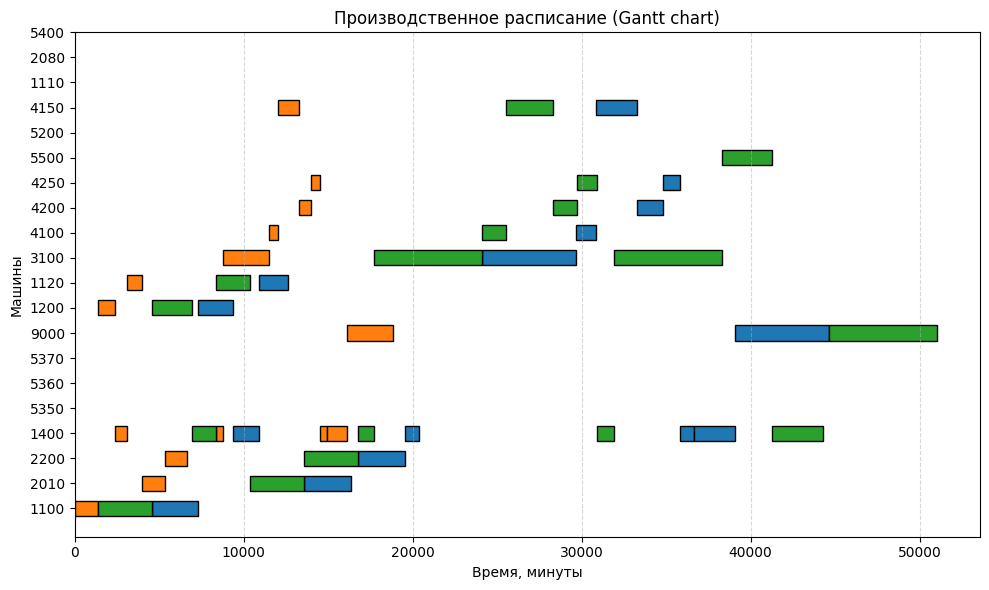

In [113]:
machine_names = machines  # если хочешь показывать реальные имена машин
plot_gantt_chart(jobs_data, all_tasks, solver, num_machines=20, machine_names=machine_names)

In [25]:
import matplotlib.pyplot as plt

def plot_gantt_chart(jobs_data, all_tasks, solver, num_machines=28, machine_names=None):
    """
    Строит Gantt chart производственного расписания.

    Parameters:
        jobs_data : list of tuples
            Список заказов [(deadline, [этапы]), ...]
        all_tasks : dict
            Словарь переменных модели: (start, end, alternatives) для каждого этапа
        solver : CpSolver
            Решатель с найденным решением
        num_machines : int
            Общее количество машин
        machine_names : list of str, optional
            Имена машин для оси Y (по умолчанию просто номера 0..num_machines-1)
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    for order_id, (deadline, tasks) in enumerate(jobs_data):
        order_color = colors[order_id % len(colors)]
        
        # --- Этапы заказа ---
        for task_id, machines in enumerate(tasks):
            start, end, alternatives = all_tasks[(order_id, task_id)]
            s_val, e_val = solver.Value(start), solver.Value(end)

            chosen = None
            for machine_id, duration, is_selected, _ in alternatives:
                if solver.Value(is_selected):
                    chosen = machine_id
                    break

            ax.barh(y=chosen, width=e_val - s_val, left=s_val,
                    height=0.6, align="center",
                    color=order_color, edgecolor="black")

        # --- Линия дедлайна ---
        ax.axvline(x=deadline, color=order_color, linestyle="--", linewidth=2, alpha=0.8)

        # Подписи добавим позже (после установки лимитов)

    # --- Настройки графика ---
    ax.set_yticks(range(num_machines))
    if machine_names:
        ax.set_yticklabels(machine_names)
    else:
        ax.set_yticklabels([str(m) for m in range(num_machines)])

    ax.set_xlabel("Время, минуты")
    ax.set_ylabel("Машины")
    ax.set_title("Производственное расписание (Gantt chart)")
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)

    # --- Подписи заказов: чуть ниже верхней рамки ---
    ylim = ax.get_ylim()
    y_pos = ylim[1] - 0.5  # немного ниже верхней границы
    for order_id, (deadline, _) in enumerate(jobs_data):
        order_color = colors[order_id % len(colors)]
        ax.text(deadline - 50, y_pos, f"Заказ-{order_id}",
                color=order_color, ha="right", va="top",
                fontsize=9, fontweight="bold")

    plt.tight_layout()
    plt.show()


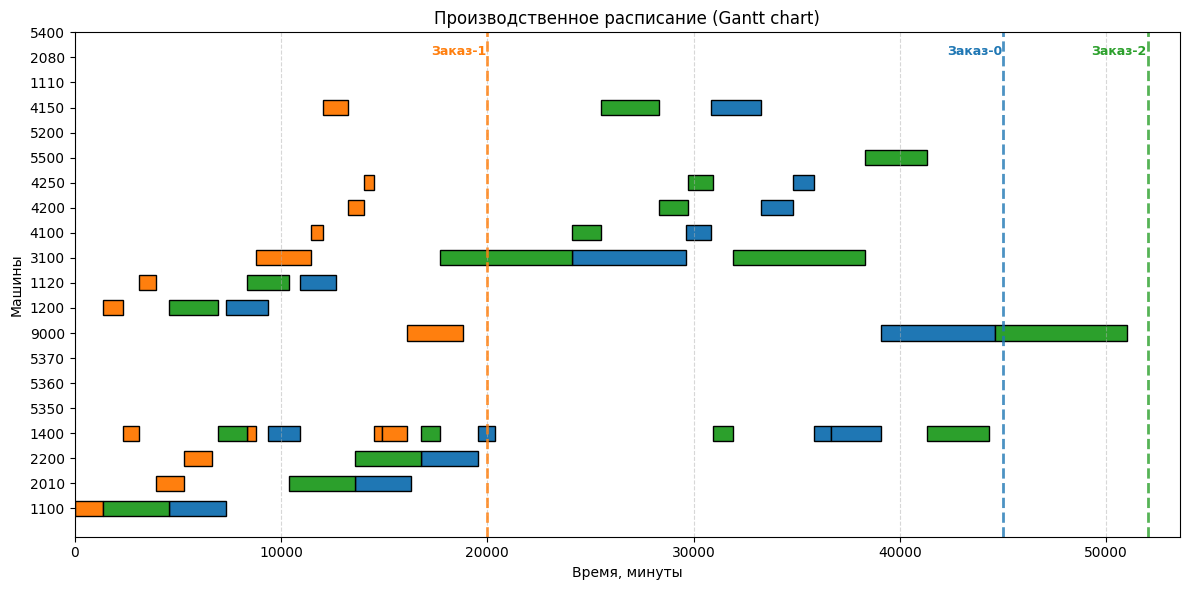

In [27]:
machine_names = machines  # если хочешь показывать реальные имена машин
plot_gantt_chart(jobs_data, all_tasks, solver, num_machines=20, machine_names=machine_names)

### Добавить загрузку Рабочи Центров (РЦ)
#### Нужно вычислить загрузку каждой машины (РЦ) за период, равный времени выполнения всех заказов (от старта первой операции до окончания последней).

In [ ]:
def calc_utilization(all_jobs: pd.DataFrame):
    """
    Рассчитывает загрузку машин (РЦ):
    1) По всему набору заказов сразу (по каждой машине, участвующей в изготовлении всех активных заказов)
    2) Среднюю загрузку по всем машинам для всех заказов (одно число)
    """

    results = {}

    # --- 1. Загрузка по всем заказам сразу ---
    total_period = all_jobs["Время, мин"].sum()  # общий горизонт (упрощённо: все этапы подряд)
    machine_work = all_jobs.groupby("РЦ")["Время, мин"].sum().reset_index()
    machine_work.rename(columns={"Время, мин": "Рабочее время, мин"}, inplace=True)
    machine_work["Загрузка, %"] = machine_work["Рабочее время, мин"] / total_period * 100

    results["machines_total"] = machine_work

    # --- 2. Средняя загрузка по всем машинам для всех заказов ---
    avg_util_all = machine_work["Загрузка, %"].mean()
    results["avg_all_machines"] = avg_util_all

    return results


In [40]:
df = pd.concat(all_jobs)   # если у вас список датафреймов по заказам
res = calc_utilization(df)

print("Загрузка машин по всем заказам:")
print(res["machines_total"])

print("\nСредняя загрузка по всем машинам для всех заказов," \
" от старта первого этапа до окончания последнего:")


print(res["avg_all_machines"])


Загрузка машин по всем заказам:
      РЦ  Рабочее время, мин  Загрузка, %
0   1100              7314.0     7.213174
1   1120              4571.2     4.508185
2   1200              5485.5     5.409881
3   1400             14715.6    14.512741
4   2010              7314.0     7.213174
5   2200              7314.0     7.213174
6   3100             21027.8    20.737925
7   4100              3134.5     3.091290
8   4150              6453.4     6.364438
9   4200              3697.3     3.646332
10  4250              2742.7     2.704891
11  5500              3000.0     2.958644
12  9000             14627.8    14.426151

Средняя загрузка по всем машинам для всех заказов, от старта первого этапа до окончания последнего:
7.69230769230769


 #### Вывод среднего значения загрузки на график Gantt сверху слева

In [44]:
import matplotlib.pyplot as plt

def plot_gantt_chart(jobs_data, all_tasks, solver, utilization_results, num_machines=28, machine_names=None):
    """
    Строит Gantt chart производственного расписания + выводит среднюю загрузку.

    Parameters:
        jobs_data : list of tuples
            Список заказов [(deadline, [этапы]), ...]
        all_tasks : dict
            Словарь переменных модели: (start, end, alternatives) для каждого этапа
        solver : CpSolver
            Решатель с найденным решением
        utilization_results : dict
            Результаты calc_utilization (res)
        num_machines : int
            Общее количество машин
        machine_names : list of str, optional
            Имена машин для оси Y (по умолчанию просто номера 0..num_machines-1)
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    for order_id, (deadline, tasks) in enumerate(jobs_data):
        order_color = colors[order_id % len(colors)]
        
        # --- Этапы заказа ---
        for task_id, machines in enumerate(tasks):
            start, end, alternatives = all_tasks[(order_id, task_id)]
            s_val, e_val = solver.Value(start), solver.Value(end)

            chosen = None
            for machine_id, duration, is_selected, _ in alternatives:
                if solver.Value(is_selected):
                    chosen = machine_id
                    break

            ax.barh(y=chosen, width=e_val - s_val, left=s_val,
                    height=0.6, align="center",
                    color=order_color, edgecolor="black")

        # --- Линия дедлайна ---
        ax.axvline(x=deadline, color=order_color, linestyle="--", linewidth=2, alpha=0.8)

        # --- Подпись "Заказ-i" ---
        ylim = ax.get_ylim()
        y_pos = ylim[1] - 0.5
        ax.text(deadline - 50, y_pos, f"Заказ-{order_id}",
                color=order_color, ha="right", va="top",
                fontsize=9, fontweight="bold")

    # --- Настройки графика ---
    ax.set_yticks(range(num_machines))
    if machine_names:
        ax.set_yticklabels(machine_names)
    else:
        ax.set_yticklabels([str(m) for m in range(num_machines)])

    ax.set_xlabel("Время, минуты")
    ax.set_ylabel("Машины")
    ax.set_title("Производственное расписание (Gantt chart)")
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)

    # --- Средняя загрузка по всем машинам (выводим в левом верхнем углу) ---
    avg_util = utilization_results["avg_all_machines"]
    ax.text(0.01, 0.99, f"Средняя загрузка РЦ: {avg_util:.1f}%",
            transform=ax.transAxes, ha="left", va="top",
            fontsize=10, fontweight="bold", color="black",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

    plt.tight_layout()
    plt.show()


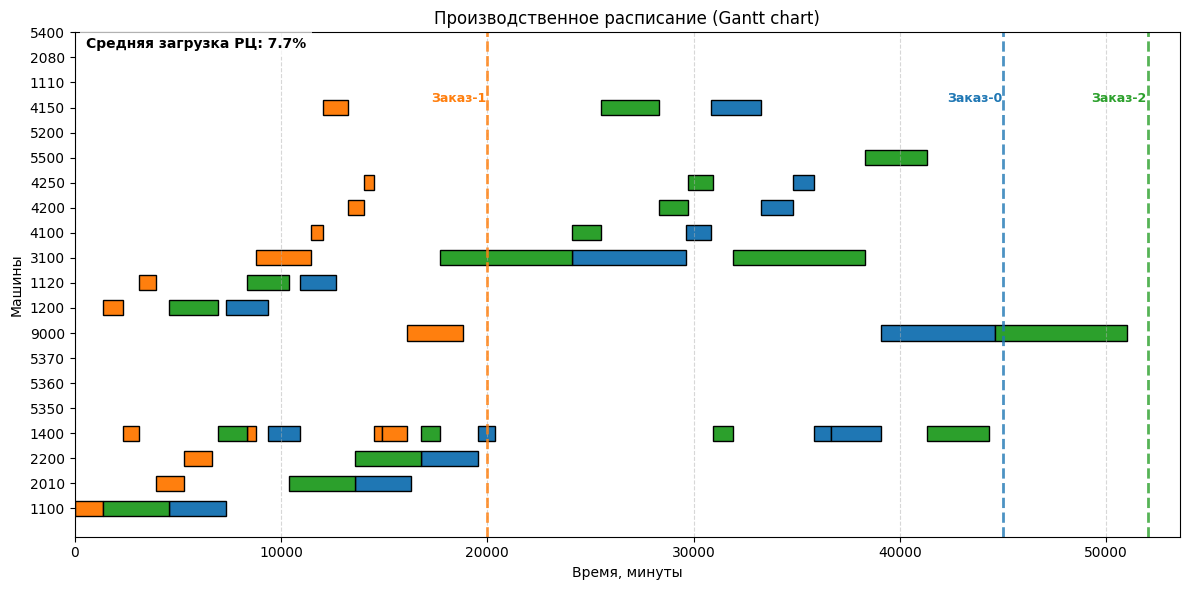

In [ ]:
df = pd.concat(all_jobs)   # объединяем все заказы
res = calc_utilization(df)

machine_names = machines  # если хочешь показывать реальные имена машин
plot_gantt_chart(jobs_data, all_tasks, solver, res, num_machines=20, machine_names=machine_names)
